# Module 1: Peer Reviewed Assignment

### Outline:
The objectives for this assignment:

1. Learn when and how simulated data is appropriate for statistical analysis.
2. Experiment with the processes involved in simulating linear data.
3. Observe how the variance of data effects the best-fit line, even for the same underlying population.
4. Recognize the effects of standardizing predictors.
5. Interpreting the coefficients of linear models on both original and standardized data scales.


General tips:

1. Read the questions carefully to understand what is being asked.
2. This work will be reviewed by another human, so make sure that you are clear and concise in what your explanations and answers.

**A Quick Note On Peer-Reviewed Assignments**

Welcome to your first peer reviewed assignment! These assignments will be a more open form than the auto-graded assignments, and will focus on interpretation and visualization rather than "do you get the right numbers?" These assignments will be graded by your fellow students (except in the specific cases where the work needs to be graded by a proctor) so please make your answers as clear and concise as possible.

In [1]:
# This cell loads the necesary libraries for this assignment
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# Problem 1: Simulating Data

We're going to let you in on a secret. The turtle data from the autograded assignment was simulated...fake data! Gasp! Importantly, simulating data, and applying statistical models to simulated data, are very important tools in data science.

Why do we use simulated data? Real data can be messy, noisy, and we almost never *really* know the underlying process that generated real data. Working with real data is always our ultimate end goal, so we will try to use as many real datasets in this course as possible. However, applying models to simulated data can be very instructive: such applications help us understand how models work in ideal settings, how robust they are to changes in modeling assumptions, and a whole host of other contexts.

And in this problem, you are going to learn how to simulate your own data.

#### 1. (a) A Simple Line

Starting out, generate $10$ to $20$ data points for values along the x-axis. Then generate data points along the y-axis using the equation $y_i=\beta_0 + \beta_1x_i$. Make it a straight line, nothing fancy.

Plot your data (using ggplot!) with your $\mathbf{x}$ data along the x-axis and your $\mathbf{y}$ data along the y-axis.

In the *Markdown* cell below the `R` cell, describe what you see in the plot.

**Tip**: You can generate your x-data *deterministically*, e.g., using either `a:b` syntax or the `seq()` function, or *randomly* using something like `runif()` or `rnorm()`. In practice, it won't matter all that much which one you choose.

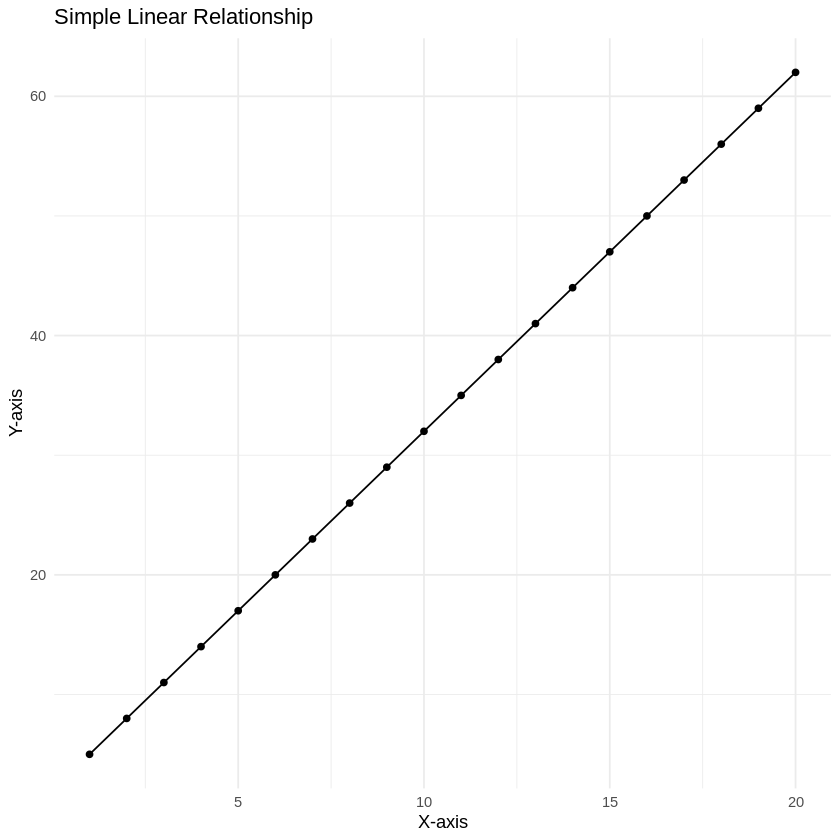

In [2]:
# Your Code Here
set.seed(123)  # Set seed for reproducibility
x <- seq(1, 20, length.out = 20)  # 20 data points from 1 to 20

# Define the parameters for the line equation
beta0 <- 2  # Intercept
beta1 <- 3  # Slope

# Generate data points for y using the equation yi = beta0 + beta1 * xi
y <- beta0 + beta1 * x

# Create a data frame with x and y
data <- data.frame(x = x, y = y)

# Plot the data using ggplot
ggplot(data, aes(x = x, y = y)) +
  geom_point() +
  geom_line() +
  labs(title = "Simple Linear Relationship", x = "X-axis", y = "Y-axis") +
  theme_minimal()

I see a direct linear relationship between the response variable and input variable. 

#### 1. (b) The Error Component

That is a perfect set of data points, but that is a problem in itself. In almost any real life situation, when we measure data, there will be some error in those measurements. Recall that our simple linear model is of the form:

$$ y_i = \beta_0 + \beta_1x_i + \epsilon_i,  \qquad \epsilon_i \sim N(0, \sigma^2) $$

Add an error term to your y-data following the formula above. Plot at least three different plots (using ggplot!) with the different values of $\sigma^2$. 

How does the value of $\sigma^2$ affect the final data points? Type your answer in the *Markdown* cell below the `R` cell.

**Tip**: To randomly sample from a normal distribution, check out the `rnorm()` function.

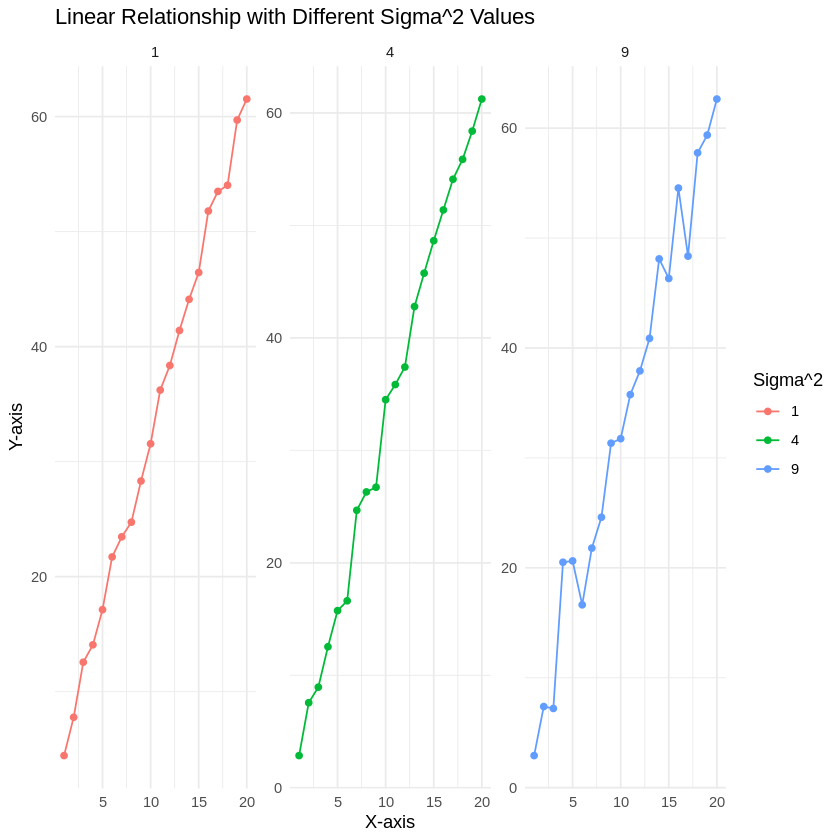

In [3]:
# Your Code Here
# Generate data points for x
set.seed(123)  # Set seed for reproducibility
x <- seq(1, 20, length.out = 20)  # 20 data points from 1 to 20

# Define the parameters for the line equation
beta0 <- 2  # Intercept
beta1 <- 3  # Slope

# Define different values for sigma^2
sigma2_values <- c(1, 4, 9)

# Create a data frame to store the results
data_list <- list()

# Loop over each sigma^2 value
for (sigma2 in sigma2_values) {
  # Generate the error term
  epsilon <- rnorm(20, mean = 0, sd = sqrt(sigma2))
  
  # Generate data points for y using the equation yi = beta0 + beta1 * xi + epsilon
  y <- beta0 + beta1 * x + epsilon
  
  # Store the data in the list
  data_list[[paste0("sigma2_", sigma2)]] <- data.frame(x = x, y = y, sigma2 = sigma2)
}

# Combine all data frames into one
combined_data <- do.call(rbind, data_list)

# Plot the data using ggplot
ggplot(combined_data, aes(x = x, y = y, color = as.factor(sigma2))) +
  geom_point() +
  geom_line() +
  facet_wrap(~ sigma2, scales = "free") +
  labs(title = "Linear Relationship with Different Sigma^2 Values", 
       x = "X-axis", 
       y = "Y-axis", 
       color = "Sigma^2") +
  theme_minimal()

As variance  increases, the spread of the data points around the line increases, making the linear relationship less clear. This demonstrates the impact of the error term on the data and how higher variance in the error term can obscure the underlying linear trend. It might also point to unobserved endogenous variables embedded in the error term. 

# Problem 2: The Effects of Variance on Linear Models

Once you've completed **Problem 1**, you should have three different "datasets" from the same underlying data function but with different variances. Let's see how those variance affect a best fit line.

Use the `lm()` function to fit a best-fit line to each of those three datasets. Add that best fit line to each of the plots and report the slopes of each of these lines.

Do the slopes of the best-fit lines change as $\sigma^2$ changes? Type your answer in the *Markdown* cell below the `R` cell.

**Tip**: The `lm()` function requires the syntax `lm(y~x)`.

`geom_smooth()` using formula 'y ~ x'



sigma2_1.x sigma2_4.x sigma2_9.x 
  2.983955   3.128451   3.059239

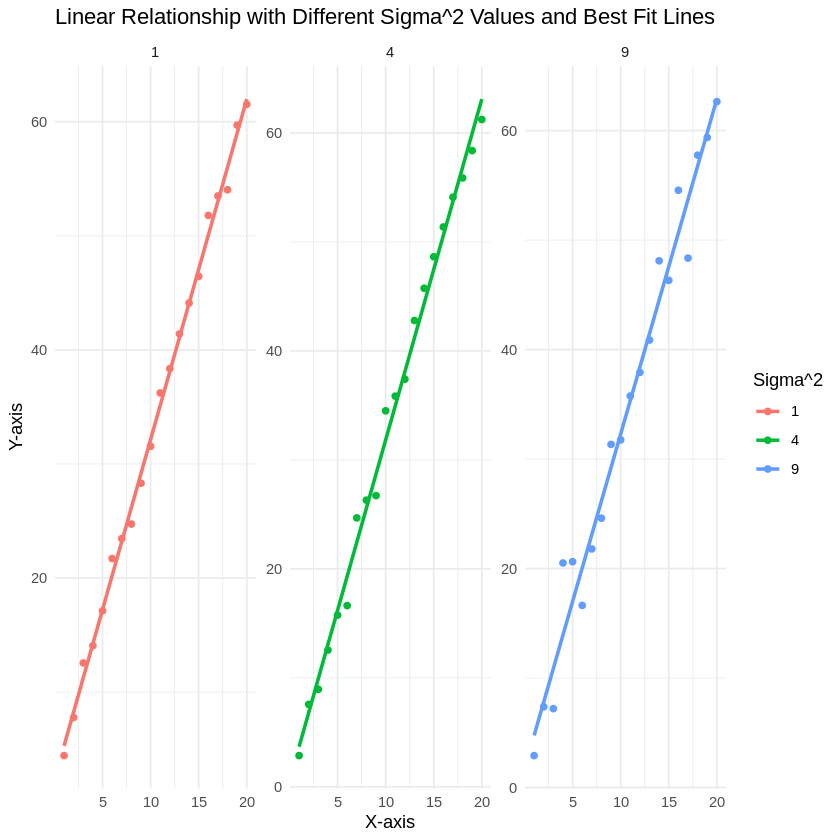

In [4]:
set.seed(123)  # Set seed for reproducibility
x <- seq(1, 20, length.out = 20)  # 20 data points from 1 to 20

beta0 <- 2  # Intercept
beta1 <- 3  # Slope

sigma2_values <- c(1, 4, 9)

data_list <- list()
models <- list()

for (sigma2 in sigma2_values) {
  # Generate the error term
  epsilon <- rnorm(20, mean = 0, sd = sqrt(sigma2))
  
  # Generate data points for y using the equation yi = beta0 + beta1 * xi + epsilon
  y <- beta0 + beta1 * x + epsilon
  
  # Store the data in the list
  data <- data.frame(x = x, y = y, sigma2 = sigma2)
  data_list[[paste0("sigma2_", sigma2)]] <- data
  
  # Fit a linear model
  model <- lm(y ~ x, data = data)
  models[[paste0("sigma2_", sigma2)]] <- model
}

# Combine all data frames into one
combined_data <- do.call(rbind, data_list)

# Extract the slopes from the models
slopes <- sapply(models, function(model) coef(model)[2])

# Plot the data using ggplot and add the best fit lines
plot <- ggplot(combined_data, aes(x = x, y = y, color = as.factor(sigma2))) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  facet_wrap(~ sigma2, scales = "free") +
  labs(title = "Linear Relationship with Different Sigma^2 Values and Best Fit Lines", 
       x = "X-axis", 
       y = "Y-axis", 
       color = "Sigma^2") +
  theme_minimal()

print(plot)

# Report the slopes of the best-fit lines
slopes


As variance increases, the slopes of the best-fit lines tend to deviate more from the true slope. This is because higher variance in the error term increases the noise in the data, making it harder for the linear model to accurately estimate the underlying relationship. The increased scatter in the data points leads to greater variability in the estimated slopes.

The deterministic component of the model remains the same, but the noise level increases. When this happens, extreme deviations can cause the parameters to increase or decrease. Parameters are a function of variance level. 

# Problem 3: Interpreting the Linear Model

Choose one of the above three models and write out the actual equation of that model. Then in words, in the *Markdown* cell below the `R` cell, describe how a $1$ unit increase in your predictor affects your response. Does this relationship make sense?

In [5]:
# Your Code Here
#sigma^2 = 4
model_sigma2_4 <- models[["sigma2_4"]]

summary(model_sigma2_4)

coefficients <- coef(model_sigma2_4)
intercept <- coefficients[1]
slope <- coefficients[2]

equation <- paste0("y = ", round(intercept, 2), " + ", round(slope, 2), "x")
equation


Call:
lm(formula = y ~ x, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.69284 -0.98505 -0.03283  0.96032  2.67437 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.54875    0.70430   0.779    0.446    
x            3.12845    0.05879  53.211   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.516 on 18 degrees of freedom
Multiple R-squared:  0.9937,	Adjusted R-squared:  0.9933 
F-statistic:  2831 on 1 and 18 DF,  p-value: < 2.2e-16


[1] "y = 0.55 + 3.13x"

In this model, the slope of the line is 3.13, which means that a 1 unit increase in the predictor  x results in an increase of 3.13 units in the response  y. This relationship makes sense given the context of our data generation process, where the true underlying slope was 3. The estimated slope is very close to the true value, showing that even with the added error, the linear model has captured the underlying trend well. However, it is important to note that the presence of error (variance) affects the precision of our estimates, but the general linear relationship remains logical and consistent with the expected behavior.It is important to note that in practice, we rarely know the true DGP, making the assessment more difficult in practice. 


# Problem 4: The Effects of Standardizing Data

We spent some time standardizing data in the autograded assignment. Let's do that again with your simulated data. 

Using the same model from **Problem 3**, standardize your simulated predictor. Then, using the `lm()` function, fit a best fit line to the standardized data. Using ggplot, create a scatter plot of the standardized data and add the best fit line to that figure.

`geom_smooth()` using formula 'y ~ x'




Call:
lm(formula = y ~ x_standardized, data = data_sigma2_4)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.69284 -0.98505 -0.03283  0.96032  2.67437 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     33.3975     0.3390   98.51   <2e-16 ***
x_standardized  18.5082     0.3478   53.21   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.516 on 18 degrees of freedom
Multiple R-squared:  0.9937,	Adjusted R-squared:  0.9933 
F-statistic:  2831 on 1 and 18 DF,  p-value: < 2.2e-16


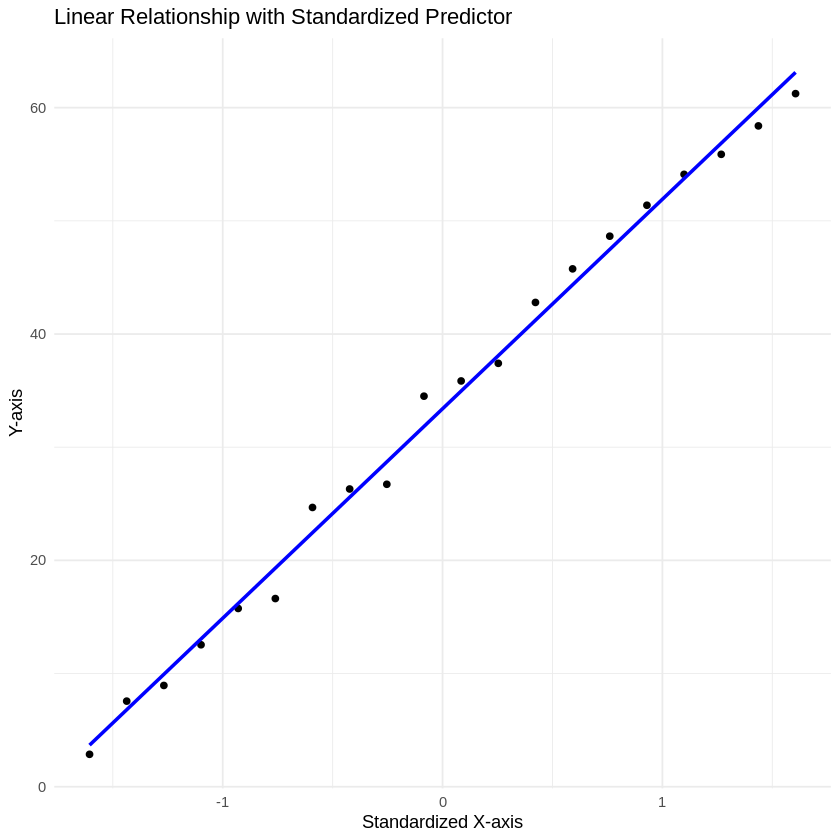

In [6]:
data_sigma2_4 <- data_list[["sigma2_4"]]

#standardize the predictor
standardize <- function(x) {
  (x - mean(x)) / sd(x)
}

x_standardized <- standardize(data_sigma2_4$x)

# Add the standardized predictor to the data frame
data_sigma2_4$x_standardized <- x_standardized

model_standardized <- lm(y ~ x_standardized, data = data_sigma2_4)

plot_standardized <- ggplot(data_sigma2_4, aes(x = x_standardized, y = y)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "blue") +
  labs(title = "Linear Relationship with Standardized Predictor", 
       x = "Standardized X-axis", 
       y = "Y-axis") +
  theme_minimal()

print(plot_standardized)

summary(model_standardized)


"Standardize" takes in a vector and returns the standardized values by subtracting the mean and dividing by the standard deviation. 

# Problem 5: Interpreting the Standardized Model

Write out the expression for your standardized model. In words, in the *Markdown* cell below the `R` cell, describe how a $1$ unit increase in your standardized predictor affects the response. Is this value different from the original model? If yes, then what can you conclude about interpretation of standardized predictors vs. unstandardized predictors.

In [7]:
# Your Code Here
# Extract the coefficients to write out the equation
coefficients_standardized <- coef(model_standardized)
intercept_standardized <- coefficients_standardized[1]
slope_standardized <- coefficients_standardized[2]

# Write out the actual equation
equation_standardized <- paste0("y = ", round(intercept_standardized, 2), " + ", round(slope_standardized, 2), " * x_standardized")
equation_standardized


[1] "y = 33.4 + 18.51 * x_standardized"

Standardization normalizes the data around mean zero for better interpretability and model comparability. Standardization changes the scale of the data but preserves the relationships between variables. When predictors are standardized, the coefficients in linear models can be interpreted as the change in the response variable for a one standard deviation change in the predictor, making it easier to understand the relative importance of different predictors.

In our context, a one standard deviation increase in the predictor X results in an 18.51 unit increase in Y.